## test 
https://gseapy.readthedocs.io/en/master/gseapy_example.html#4.-GSEA-Example
### Single Sample GSEA example

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
gp.__version__

'0.9.9'

In [3]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("/Users/frank/github/GSEApy/tests/data/P53.cls")
#class_vector used to indicate group attributes for each sample
print(class_vector)
print(len(class_vector))

['MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT']
50


In [4]:
gene_exp = pd.read_table("/Users/frank/github/GSEApy/tests/data/P53.txt")
gene_exp.head()

,NAME,DESCRIPTION,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,TACC2,na,46.05,82.17,16.87,98.60,141.02,114.32,134.34,44.95,...,68.14,32.21,105.89,64.99,53.52,85.47,18.69,32.16,45.70,48.13
1,C14orf132,na,108.34,59.04,25.61,33.11,42.53,9.12,9.36,310.96,...,159.32,10.71,13.59,53.78,57.57,86.80,17.30,102.66,62.16,73.44
2,AGER,na,42.20,25.75,76.01,40.41,32.17,48.28,58.27,42.40,...,51.50,61.48,44.44,45.68,54.17,62.53,83.18,56.57,50.40,36.75
3,32385_at,na,7.43,13.94,8.55,21.13,15.09,19.05,16.47,7.60,...,30.77,21.27,13.36,16.19,12.07,17.62,22.60,4.50,14.59,11.33
4,RBM17,na,11.40,3.00,3.16,2.34,4.43,1.56,6.04,6.16,...,1.62,2.77,4.42,8.91,12.28,3.04,10.13,8.32,8.23,3.91


In [5]:
print("positively correlated: ", phenoA)

positively correlated:  MUT


In [6]:
print("negtively correlated: ", phenoB)


negtively correlated:  WT


In [7]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='KEGG_2016', # enrichr library names
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4,
                 format='png')

In [8]:
#access the dataframe results throught res2d attribute
gs_res.res2d.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Salivary secretion_Homo sapiens_hsa04970,-0.399154,-1.461937,0.075630,0.541187,89,70,CALM2;PLCB3;KCNN4;DMBT1;TRPV6;CALM3;ATP1B3;SLC...,GUCY1A2;SLC9A1;HTN3;ITPR2;ADCY2;ADCY3;NOS1;ATP...
Allograft rejection_Homo sapiens_hsa05330,-0.595432,-1.272286,0.217391,0.550421,38,28,HLA-DOB;CD86;IL12B;HLA-DRB4;HLA-A;CD28;IL5;HLA...,HLA-DRA;HLA-DMA;HLA-DPA1;IL2;IFNG;HLA-DQB1;HLA...
Hematopoietic cell lineage_Homo sapiens_hsa04640,-0.354891,-1.266113,0.198198,0.554966,88,82,ITGA6;IL7R;CD59;CD33;CD9;GP1BB;ITGA2;CD37;IL3R...,GP9;EPO;HLA-DRB3;IL3;IL11RA;KIT;HLA-DRA;CD3E;C...
Leishmaniasis_Homo sapiens_hsa05140,-0.399866,-1.273941,0.180851,0.558055,73,59,RELA;IRAK1;IFNGR1;ELK1;IFNGR2;MAPK13;TRAF6;FOS...,HLA-DRA;STAT1;HLA-DMA;JAK2;HLA-DPA1;NCF2;IFNG;...
Jak-STAT signaling pathway_Homo sapiens_hsa04630,-0.338909,-1.389667,0.100775,0.563397,158,125,PIK3CA;EP300;SOCS5;OSMR;IL6ST;IL7R;FHL1;GFAP;I...,STAT5A;GHR;IL10;AKT1;IFNW1;LIF;PIAS1;CTF1;PIAS...


### show the results 
The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.
But if you need to do it yourself, use the code below

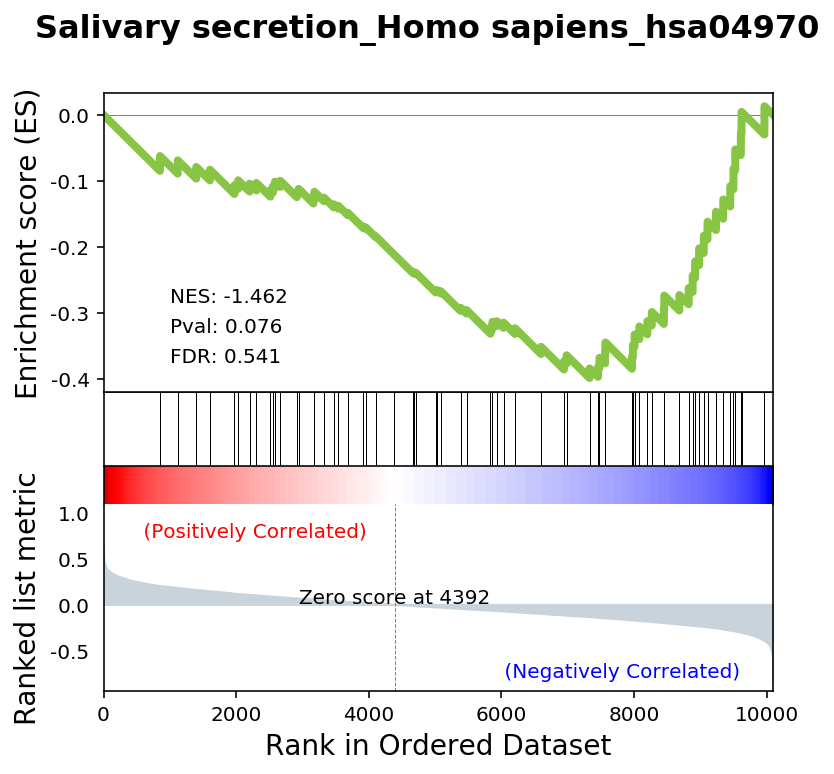

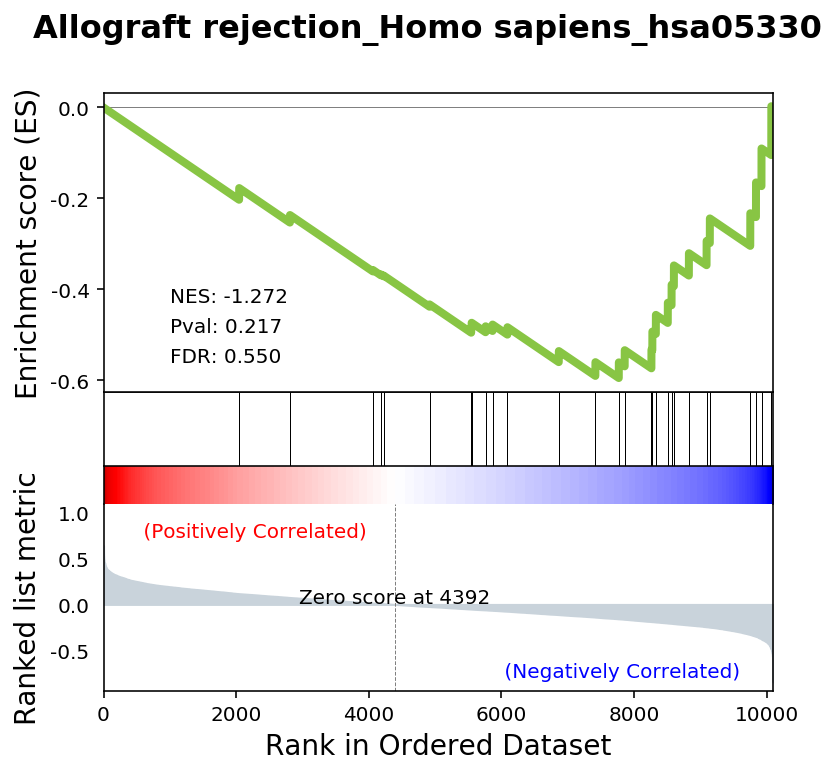

In [9]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
gseaplot(gs_res.ranking, term=terms[0], **gs_res.results[terms[0]])
gseaplot(gs_res.ranking, term=terms[1], **gs_res.results[terms[1]])

In [14]:
gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='./dat/glists/gsea.gmt', # enrichr library names
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4,
                 format='png')

In [15]:
gs_res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
ST8SIA1-_dorrell,0.213260,0.862674,0.571429,0.818182,65,36,SLC5A1;TNFRSF21;BNIP3;MT1X;OXCT1;DNAJB4;PPARD;...,SLC5A1;TNFRSF21;BNIP3;MT1X;OXCT1;DNAJB4;PPARD;...
A2_alpha,-0.298299,-1.311402,0.000000,0.872727,240,104,APEX2;PPARG;FST;LOX;PRSS3;EMD;PDE1C;CSTF2;PDLI...,RRAGD;FBP1;KCNA5;F7;MAT1A;GPR37L1;SRPX;PDE6C;N...
Beta sub2_xin,-0.240537,-0.631775,1.000000,0.963636,28,24,SCG2;IGFBP5;ID3;RGS16;FOS;ID1;TFF3;SIX3;RBP1;A...,CDKN1C;RPS4X;GPX3;JUNB;NPY;PEMT;STMN2;SPP1;RPL...
Beta sub4_xin,0.263546,1.185477,0.181818,1.000000,390,215,VAPA;LMAN1;GNG5;PHF1;SARS;CD164;CREB3;ARID5B;G...,VAPA;LMAN1;GNG5;PHF1;SARS;CD164;CREB3;ARID5B;G...
B1_beta,0.219467,0.945809,0.555556,1.000000,420,169,MAP2K1;RCOR1;UNC13B;FOXJ3;PHF1;SCEL;CHKA;MAFF;...,MAP2K1;RCOR1;UNC13B;FOXJ3;PHF1;SCEL;CHKA;MAFF;...
immature_bader,0.186959,0.916457,0.555556,1.000000,579,280,DRAP1;VAMP3;DGCR2;PPP1R8;MSLN;PSMB1;ACTL6A;NDU...,DRAP1;VAMP3;DGCR2;PPP1R8;MSLN;PSMB1;ACTL6A;NDU...
B2_beta,-0.182165,-0.732965,0.750000,1.000000,75,28,SGCB;ZNF451;ZNF273;STAR;SMAD6;ID1;ATP8B1;LMO2;...,HIST1H1E;NEUROD1;CXCL5;CXCR4;GRIK1;HPN;LY6E;KC...
CD9-_dorrell,-0.339674,-0.974745,0.750000,1.000000,57,36,NOV;WASF1;HDAC9;SPARCL1;NELL2;AMPH;FKBP5;PCDH7...,CNTN5;ASB9;CHL1;DGKB;SIM1;NPY;SLC8A1;PLK2;PRKD...
mature_bader,-0.258293,-0.947921,0.750000,1.000000,72,36,CNN1;CX3CR1;KRT12;SMARCA1;CAV1;PAWR;RAD54L;KLR...,N4BP3;NOS1;DNTT;APOC1;ASGR2;NEB;ITGA9;PSTPIP1;...
